In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from numpy import random

In [2]:
matplotlib.rcParams.update({'font.size':15})
#matplotlib.rcParams['figure.dpi'] = 150
#matplotlib.rcParams['figure.figsize'] = [5,3]
matplotlib.rcParams['text.usetex'] = True

In [120]:
# "continuous" functions on the circle
N = 10000
thetas = np.linspace(-np.pi, np.pi, N)

# amplitude
C = np.ones(N)

# random phase
random.seed(1234)
amp = 0.2
phi = random.normal(0, amp, N)

# oscillating phase
N_phi = 72 # number of phase oscillations around the circle
dTheta_phi = 2*np.pi/N_phi
phi = amp*np.cos(2*np.pi*thetas/dTheta_phi)

# real and imag parts
A = C*np.cos(phi)
B = C*np.sin(phi)

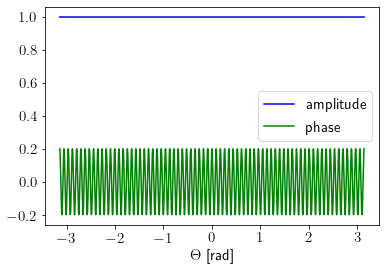

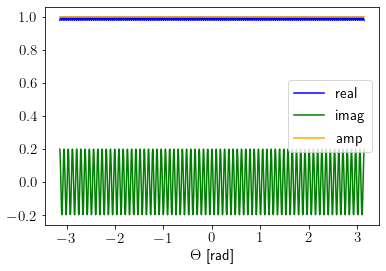

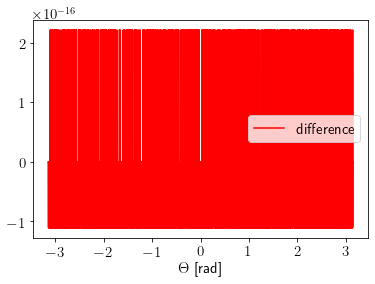

In [121]:
# plot data
plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas, C, color='blue', label='amplitude')
plt.plot(thetas, phi, color='green', label='phase')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
#plt.savefig('amp_phase', bbox_inches='tight', dpi=400)

plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas, A, color='blue', label='real')
plt.plot(thetas, B, color='green', label='imag')
plt.plot(thetas, np.sqrt(A**2 + B**2), color='orange', label='amp')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
#plt.savefig('real_imag', bbox_inches='tight', dpi=400)

plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas, np.sqrt(A**2 + B**2)-C, color='red', label='difference')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
#plt.savefig('real_imag', bbox_inches='tight', dpi=400)

In [122]:
# response function

def apply_response(x, theta0, dTheta_resp, thetas):
    '''
    calculate response which averages together theta values around theta0
    '''
    
    theta_min = theta0 - 0.5*dTheta_resp
    theta_max = theta0 + 0.5*dTheta_resp
    
    ndx = np.where((theta_min <= thetas) & (thetas <= theta_max))
    y = np.mean(x[ndx[0]])
    
    return y

In [123]:
# test response 
N_resp = 36
theta0 = 0
dTheta_resp = 2*np.pi/N_resp

x = A
y = apply_response(x, theta0, dTheta_resp, thetas)
print(y)

0.9900160139911584


In [130]:
# apply response around circle to get measured data
N_d = 100
dTheta_d = 2*np.pi/N_d

A_d = np.zeros(N_d)
B_d = np.zeros(N_d)
C_d = np.zeros(N_d)
thetas_d = np.zeros(N_d)
for ii in range(N_d):
    
    theta_i = -np.pi + ii*dTheta_d
    thetas_d[ii] = theta_i
    A_d[ii] = apply_response(A, theta_i, dTheta_d, thetas)
    B_d[ii] = apply_response(B, theta_i, dTheta_d, thetas)
    C_d[ii] = apply_response(C, theta_i, dTheta_d, thetas)



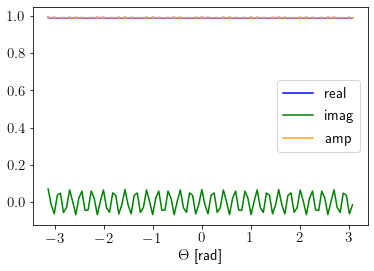

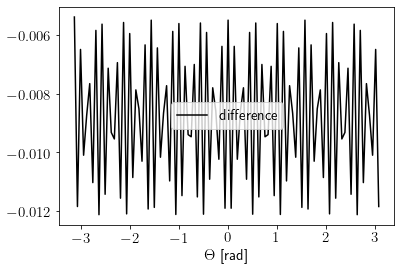

In [131]:
# plot measureed data
plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas_d, A_d, color='blue', label='real')
plt.plot(thetas_d, B_d, color='green', label='imag')
plt.plot(thetas_d, np.sqrt(A_d**2 + B_d**2), color='orange', label='amp')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
#plt.savefig('real_imag', bbox_inches='tight', dpi=400)

plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas_d, np.sqrt(A_d**2 + B_d**2)-C_d, color='k', label='difference')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
#plt.savefig('real_imag', bbox_inches='tight', dpi=400)